In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
#Task 1
#Iris dataset from sklearn
try:
    iris_data = load_iris()
    df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
    df['species'] = iris_data.target
    df['species'] = df['species'].map(dict(zip(range(3), iris_data.target_names)))
    print("Dataset loaded successfully.")
except Exception as e:
    print("Error loading dataset:", e)

Dataset loaded successfully.


In [3]:
#Display the first 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
#Check data types and missing values
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Missing values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [5]:
#Check data types and missing values
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Missing values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [6]:
#Task 2
#Basic statistics
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#Group by species and compute the mean of features
grouped = df.groupby('species').mean()
grouped

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


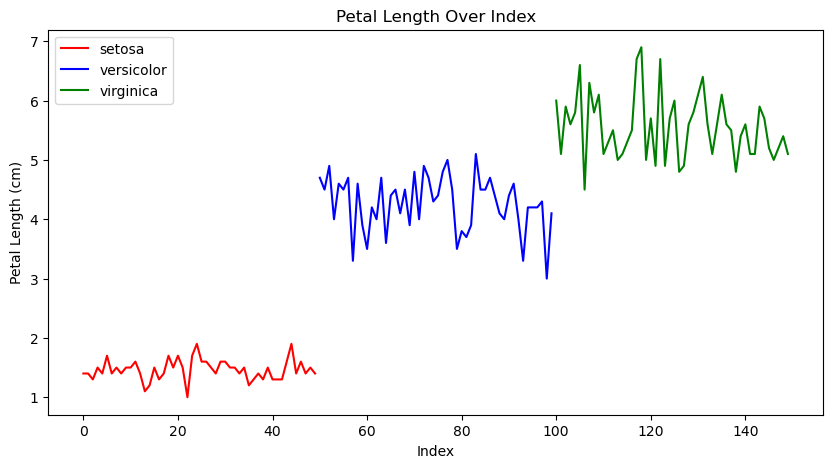

In [8]:
#Task 3
#Line Chart
plt.figure(figsize=(10, 5))
colors = {'setosa': 'red', 'versicolor': 'blue', 'virginica': 'green'}
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.plot(subset.index, subset['petal length (cm)'], label=species, color=colors[species])
plt.title("Petal Length Over Index")
plt.xlabel("Index")
plt.ylabel("Petal Length (cm)")
plt.legend()
plt.show()



C:\Users\admin\AppData\Local\Temp\ipykernel_3260\2466342071.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped.index, y=grouped['petal length (cm)'], palette=['lightblue','grey','teal',])


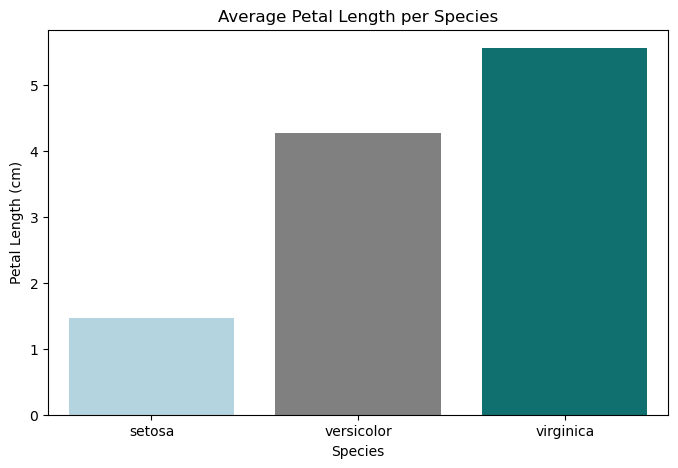

In [9]:
#Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(x=grouped.index, y=grouped['petal length (cm)'], palette=['lightblue','grey','teal',])
plt.title("Average Petal Length per Species")
plt.ylabel("Petal Length (cm)")
plt.xlabel("Species")
plt.show()

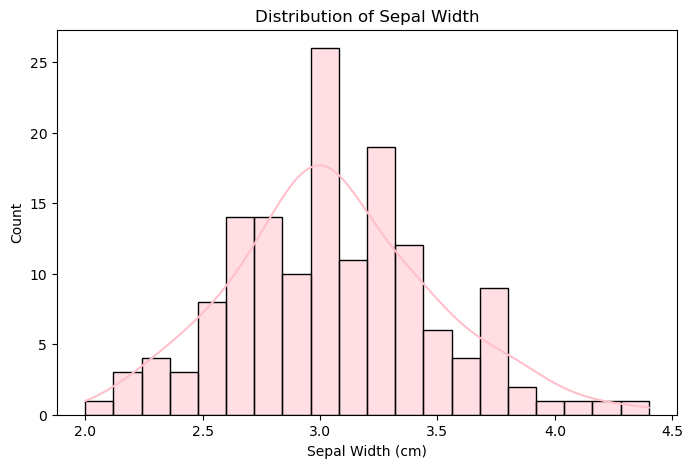

In [10]:
#Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['sepal width (cm)'], bins=20, kde=True, color='pink')
plt.title("Distribution of Sepal Width")
plt.xlabel("Sepal Width (cm)")
plt.show()

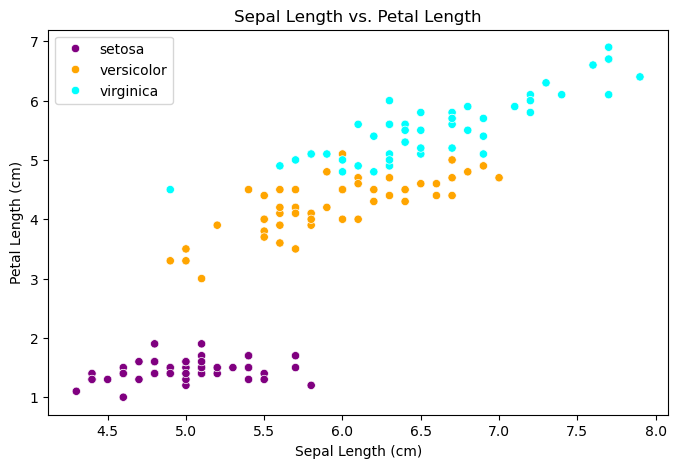

In [11]:
#Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='sepal length (cm)', y='petal length (cm)', hue='species', palette={'setosa': 'purple', 'versicolor': 'orange', 'virginica': 'cyan'})
plt.title("Sepal Length vs. Petal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend()
plt.show()